Types of Missing Data
• MCAR (Missing Completely at Random)
• No reason why! Totally random

• MAR (Missing at Random)
• Difference between MCAR and MAR is MAR is typically missing only in a
subset of data – the subset of data is determined by another value, and
randomly missing; often requires domain knowledge

• MNAR (Missing NOT at Random) – missing data can contain information
• There is definitely a pattern as to why the data is missing


### summary of our 10 Models :

original data
#### one original  model Baseline


• MCAR (Missing Completely at Random)
step 2 1%, 5% 10%, 20%, 33%, and 50% of your data in a single column 

#### five  MCAR models :
#### MCAR1 MCAR5 MCAR10 MCAR20 MCAR33 MCAR50

• MAR (Missing at Random)
step 3 10%, 20% and 30% of your missing data.

#### three MAR models :
#### MAR10   MAR20  MAR30


• MNAR (Missing NOT at Random) – missing data can contain information
25% of the data is missing for a single column.
#### one MNAR  model MNAR


__DD:__ To get ml_metrics installed I had to use Anaconda command prompt and run __pip install ml_metrics__.  I am under the impression that we should avoid using pip in an Anaconda environment but I had no choice.

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from ml_metrics import rmse
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from pandas_profiling import ProfileReport

In [2]:
boston = load_boston()

# Convert the matrix to pandas
bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos['MEDV'] = boston.target
#bos.head()
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [3]:
bos.isnull().sum() #show the original dataframe is complete

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [4]:
#ALTERNATE just print the descr
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
# prof = ProfileReport(bos)
# ProfileReport(bos)

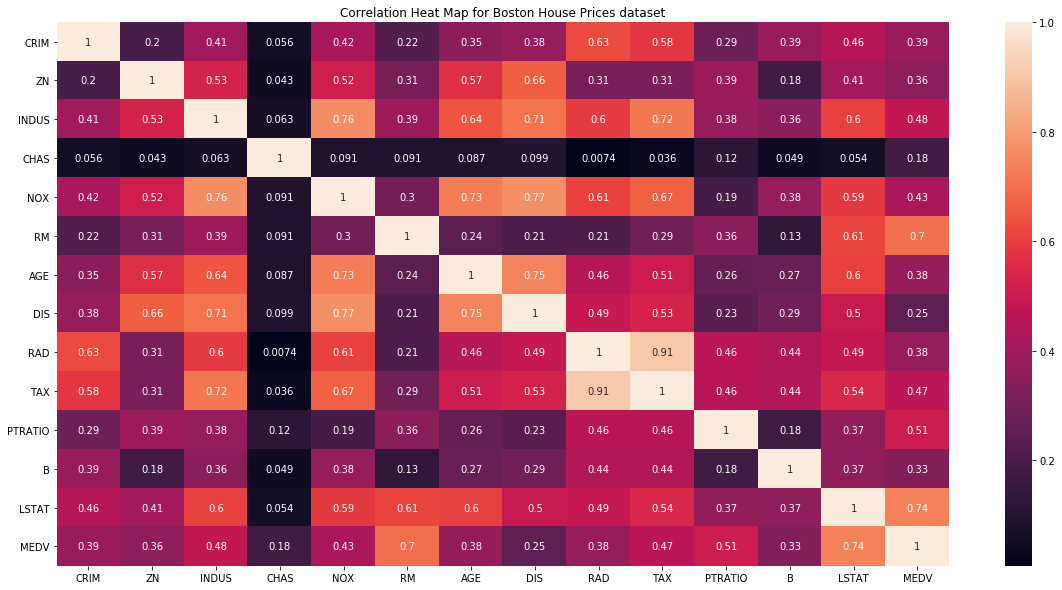

In [6]:
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(20, 10))
sns.heatmap(bos.corr().abs(),  annot=True)
plt.title("Correlation Heat Map for Boston House Prices dataset")
plt.savefig("heatmap.png")

#corr heatmap show these variables are relatively higly correlated to our target variable MEDV: RM, LSTAT,PTRATIO
# i expect important features missing be more impactful, will compare the effect of missing DIS , RM, LSTAT,PTRATIO at last step
# experiment result: high corr does not equal to important feature (see last table printout)

In [7]:
#check corr between variables

print(bos[["LSTAT","PTRATIO"]].corr())
print(bos[["RM","LSTAT"]].corr())

# multicollinearity??
# variables RM and LSTAT are highly correlated with each other (0.613808), if we inclue both in one model, could be problematic

            LSTAT   PTRATIO
LSTAT    1.000000  0.374044
PTRATIO  0.374044  1.000000
             RM     LSTAT
RM     1.000000 -0.613808
LSTAT -0.613808  1.000000


__Step 1:__
Use sklearn.datasets to get the Boston Housing dataset.  Fit a linear regressor to the data as a baseline.  There is no need to do Cross-Validation.  We will simply be exploring the change in results.

In [8]:
train_set = bos.sample(frac=0.7, random_state=100)
test_set = bos[~bos.isin(train_set)].dropna()
# Get the training and testing row indices for later use
train_index = train_set.index.values.astype(int)
test_index = test_set.index.values.astype(int)

# Converting the training and testing datasets back to matrix-formats
X_train = train_set.iloc[:, :-1].values # returns the data; excluding the target
Y_train = train_set.iloc[:, -1].values # returns the target-only
X_test = test_set.iloc[:, :-1].values # ""
Y_test = test_set.iloc[:, -1].values # ""

# Fit a linear regression to the training data
reg = LinearRegression(normalize=True).fit(X_train, Y_train)

#Predict
Y_pred = reg.predict(X_test)

#Get measures
orig_mae = mean_absolute_error(Y_test,Y_pred)
orig_mse = mean_squared_error(Y_test,Y_pred)
orig_rmse_val = rmse(Y_test,Y_pred)
orig_r2 = r2_score(Y_test,Y_pred)

In [9]:
reg.coef_

array([-1.35456753e-01,  5.48606010e-02,  5.46611167e-02,  3.57648807e+00,
       -2.01163242e+01,  3.96567027e+00,  1.33685712e-02, -1.48716658e+00,
        2.99295349e-01, -9.83868843e-03, -9.45023886e-01,  6.45207267e-03,
       -5.77572297e-01])

Text(0.5, 1.0, 'Feature importance using Linear Regression Model')

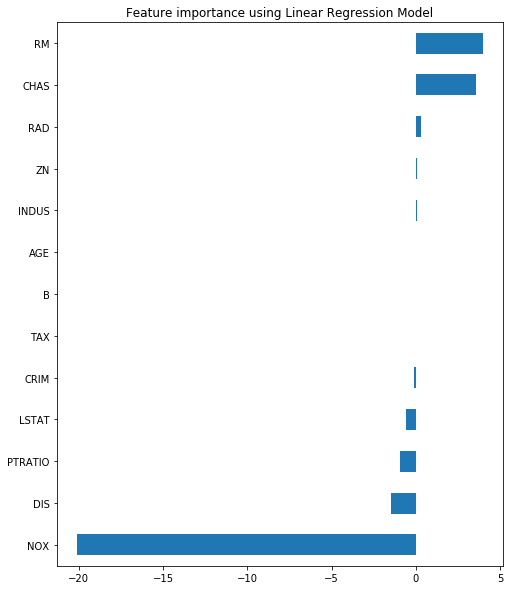

In [10]:
coef = pd.Series(reg.coef_, index = train_set.iloc[:, :-1].columns)

imp_coef = coef.sort_values()

import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Linear Regression Model")

#important feature NOX, RM
#less important DIS, INDUS

In [11]:
res_frame = pd.DataFrame({'data':'original',
                   'imputation':'none',
                   'mae': orig_mae, 
                   'mse': orig_mse, 
                   'rmse':orig_rmse_val, 
                   'R2':orig_r2,
                   'mae_diff':np.nan,
                   'mse_diff':np.nan,
                   'rmse_diff':np.nan,
                   'R2_diff':np.nan}, index=[0])

__Question 1:__ What is the loss and what are the goodness of fit parameters?  This will be our baseline for comparison.


In [12]:
res_frame

,data,imputation,mae,mse,rmse,R2,mae_diff,mse_diff,rmse_diff,R2_diff
0,original,none,3.604571,24.098505,4.909023,0.70494,NaN,NaN,NaN,NaN


__Step 2:__ (repeat for each percentage value below)
Select 1%, 5% 10%, 20%, 33%, and 50% of your data in a single column [hold that column selection constant throughout all iterations] (Completely at random), replace the original value with a NaN (i.e., “not a number” – ex., np.nan) and then perform an imputation for the missing values.   

__Question 2:__ In each case [1%, 5%, 10%, 20%, 33%, 50%] perform a fit with the imputed data and compare the loss and goodness of fit to your baseline.  [Note: you should have (6) models to compare against your baseline at this point.]


In [13]:
def definedsample(data, fraction, featurename, resultframe):
    in_sample = data.sample(frac=fraction, random_state=99)
    out_sample = data[~data.isin(in_sample)].dropna()
    in_sample[featurename] = np.nan
    in_sample[featurename] = in_sample[featurename].fillna(out_sample[featurename].mean())
    sampleddata = pd.concat([in_sample, out_sample])
    sampleddata = sampleddata.sort_index()
    train_set = sampleddata.iloc[train_index]
    test_set = sampleddata.iloc[test_index]
    X_train = train_set.iloc[:, :-1].values
    Y_train = train_set.iloc[:, -1].values
    X_test = test_set.iloc[:, :-1].values
    Y_test = test_set.iloc[:, -1].values
    
    reg = LinearRegression().fit(X_train, Y_train)
    Y_pred = reg.predict(X_test)
    
    mae = mean_absolute_error(Y_test,Y_pred)
    mse = mean_squared_error(Y_test,Y_pred)
    rmse_val = rmse(Y_test,Y_pred)
    r2 = r2_score(Y_test,Y_pred)
    print(in_sample.iloc)
    temp_frame = pd.DataFrame({'data': str(100*fraction)+'% missing completely at random: imputed using mean',
                   'imputation':'Mean',
                   'mae': mae, 
                   'mse': mse, 
                   'rmse':rmse_val,
                   'R2':r2,
                   'mae_diff':mae-orig_mae,
                   'mse_diff':mse-orig_mse,
                   'rmse_diff':rmse_val-orig_rmse_val,
                   'R2_diff':r2-orig_r2
                   }, index=[0])
    resultframe = pd.concat([resultframe, temp_frame])
    return resultframe

In [14]:
res_frame = definedsample(bos,.01,'DIS',res_frame)
res_frame = definedsample(bos,.05,'DIS',res_frame)
res_frame = definedsample(bos,.10,'DIS',res_frame)
res_frame = definedsample(bos,.20,'DIS',res_frame)
res_frame = definedsample(bos,.33,'DIS',res_frame)
res_frame = definedsample(bos,.5,'DIS',res_frame)

# res_frame = definedsample(bos,.01,'NOX',res_frame)
# res_frame = definedsample(bos,.05,'NOX',res_frame)
# res_frame = definedsample(bos,.10,'NOX',res_frame)
# res_frame = definedsample(bos,.20,'NOX',res_frame)
# res_frame = definedsample(bos,.33,'NOX',res_frame)
# res_frame = definedsample(bos,.5,'NOX',res_frame)

In [15]:
res_frame

,data,imputation,mae,mse,rmse,R2,mae_diff,mse_diff,rmse_diff,R2_diff
0,original,none,3.604571,24.098505,4.909023,0.704940,NaN,NaN,NaN,NaN
0,1.0% missing completely at random: imputed usi...,Mean,3.638791,24.316646,4.931191,0.702269,0.034219,0.218141,0.022168,-0.002671
0,5.0% missing completely at random: imputed usi...,Mean,3.553488,23.977540,4.896687,0.706421,-0.051083,-0.120964,-0.012336,0.001481
0,10.0% missing completely at random: imputed us...,Mean,3.547616,24.027511,4.901786,0.705809,-0.056955,-0.070994,-0.007236,0.000869
0,20.0% missing completely at random: imputed us...,Mean,3.641010,25.303311,5.030240,0.690188,0.036439,1.204806,0.121217,-0.014752
0,33.0% missing completely at random: imputed us...,Mean,3.707851,26.073462,5.106218,0.680759,0.103280,1.974957,0.197195,-0.024181
0,50.0% missing completely at random: imputed us...,Mean,3.624329,25.662844,5.065851,0.685786,0.019757,1.564339,0.156828,-0.019154


__Step 3:__ Take two columns and create data “Missing at Random” when controlled for a third variable (i.e., if Variable Z is > 30, then Variables X, Y are randomly missing).  Use your preferred imputation method to fill in 10%, 20% and 30% of your missing data.

__DD:__ Function below takes in multiple feature names of our choice. However the Z criterion from instructions I just hard coded for __INDUS < 7__.

In [16]:
def definedsampleXYZ(data, fraction, missingfeaturenames, resultframe):
    in_sample = data.sample(frac=fraction, random_state=99)
    out_sample = data[~data.isin(in_sample)].dropna()
    
    for x in missingfeaturenames:
        in_sample.loc[in_sample['INDUS'] < 7, x] = np.nan
        in_sample[x] = in_sample[x].fillna(out_sample[x].mean())
    
    sampleddata = pd.concat([in_sample, out_sample])
    sampleddata = sampleddata.sort_index()
        
    train_set = sampleddata.iloc[train_index]
    test_set = sampleddata.iloc[test_index]
    X_train = train_set.iloc[:, :-1].values
    Y_train = train_set.iloc[:, -1].values
    X_test = test_set.iloc[:, :-1].values
    Y_test = test_set.iloc[:, -1].values
    
    reg = LinearRegression().fit(X_train, Y_train)
    Y_pred = reg.predict(X_test)
    
    mae = mean_absolute_error(Y_test,Y_pred)
    mse = mean_squared_error(Y_test,Y_pred)
    rmse_val = rmse(Y_test,Y_pred)
    r2 = r2_score(Y_test,Y_pred)
    
    temp_frame = pd.DataFrame({'data': str(100*fraction)+'% missing at random where INDUS > 7: imputed using mean',
                   'imputation':'Mean',
                   'mae': mae, 
                   'mse': mse, 
                   'rmse':rmse_val,
                   'R2':r2,
                   'mae_diff':mae-orig_mae,
                   'mse_diff':mse-orig_mse,
                   'rmse_diff':rmse_val-orig_rmse_val,
                   'R2_diff':r2-orig_r2
                   }, index=[0])
    resultframe = pd.concat([resultframe, temp_frame])
    #print(in_sample.describe())
    return resultframe

In [17]:
missingXandY = ['DIS', 'NOX']

res_frame = definedsampleXYZ(bos,.1,missingXandY,res_frame)
res_frame = definedsampleXYZ(bos,.2,missingXandY,res_frame)
res_frame = definedsampleXYZ(bos,.3,missingXandY,res_frame)

__Question 3:__ In each case [10%, 20%, 30%] perform a fit with the imputed data and compare the loss and goodness of fit to your baseline.  [Note: you should have (9) models to compare against your baseline at this point.]

In [18]:
res_frame

,data,imputation,mae,mse,rmse,R2,mae_diff,mse_diff,rmse_diff,R2_diff
0,original,none,3.604571,24.098505,4.909023,0.704940,NaN,NaN,NaN,NaN
0,1.0% missing completely at random: imputed usi...,Mean,3.638791,24.316646,4.931191,0.702269,0.034219,0.218141,0.022168,-0.002671
0,5.0% missing completely at random: imputed usi...,Mean,3.553488,23.977540,4.896687,0.706421,-0.051083,-0.120964,-0.012336,0.001481
0,10.0% missing completely at random: imputed us...,Mean,3.547616,24.027511,4.901786,0.705809,-0.056955,-0.070994,-0.007236,0.000869
0,20.0% missing completely at random: imputed us...,Mean,3.641010,25.303311,5.030240,0.690188,0.036439,1.204806,0.121217,-0.014752
0,33.0% missing completely at random: imputed us...,Mean,3.707851,26.073462,5.106218,0.680759,0.103280,1.974957,0.197195,-0.024181
0,50.0% missing completely at random: imputed us...,Mean,3.624329,25.662844,5.065851,0.685786,0.019757,1.564339,0.156828,-0.019154
0,10.0% missing at random where INDUS > 7: imput...,Mean,3.630117,24.335170,4.933069,0.702042,0.025546,0.236665,0.024046,-0.002898
0,20.0% missing at random where INDUS > 7: imput...,Mean,3.611678,24.237506,4.923160,0.703238,0.007107,0.139001,0.014137,-0.001702
0,30.0% missing at random where INDUS > 7: imput...,Mean,3.619581,24.641156,4.963986,0.698296,0.015010,0.542652,0.054963,-0.006644


__Step 4:__  Create a “Missing Not at Random” pattern in which 25% of the data is missing for a single column.
(__concensus:__ remove a quartile)

__Question 4:__ Perform a fit with the imputed data [25%] and compare the loss and goodness of fit to your baseline.  [Note: you should have (10) models to compare against your baseline at this point.]


__DD:__ We use a function to remove the 1st quartile (anything less than 2.100175) from __only the DIS__ feature. This time hard-coding for DIS rather than INDUS.

In [19]:
bos.DIS.describe()

count    506.000000
mean       3.795043
std        2.105710
min        1.129600
25%        2.100175
50%        3.207450
75%        5.188425
max       12.126500
Name: DIS, dtype: float64

In [20]:
bos.NOX.describe()

count    506.000000
mean       0.554695
std        0.115878
min        0.385000
25%        0.449000
50%        0.538000
75%        0.624000
max        0.871000
Name: NOX, dtype: float64

In [21]:
# bos.RM.describe()

In [22]:

# bos.LSTAT.describe()

In [23]:

# bos.PTRATIO.describe()

In [24]:

#temp.DIS.loc[temp.DIS < 2.100175] = np.nan #<<This works dont fuck it up
#temp['DIS'].loc[temp['DIS'] < 2.100175] = np.nan <<This works too.. dont fuck it up
#temp.DIS.describe()

#temp=bos
# temp.DIS.loc[temp.DIS < 2.100175] = np.nan
# tempmean= temp.DIS.mean()
# temp.DIS = temp.DIS.fillna(tempmean)



In [25]:
#Because we opt to remove the lower quartile we have to handle 
#getting the mean differently. We first drop the quartile and then take the mean which inherently means our model will be terrible depenting on variable importance.

In [26]:

def definedsample25_DIS(data, featurename, resultframe):
    data[featurename].loc[data[featurename] < 2.100175] = np.nan
    data[featurename] = data[featurename].fillna(data[featurename].mean())
    sampleddata = data
    sampleddata = sampleddata.sort_index()
    train_set = sampleddata.iloc[train_index]
    test_set = sampleddata.iloc[test_index]
    X_train = train_set.iloc[:, :-1].values
    Y_train = train_set.iloc[:, -1].values
    X_test = test_set.iloc[:, :-1].values
    Y_test = test_set.iloc[:, -1].values
    
    reg = LinearRegression().fit(X_train, Y_train)
    Y_pred = reg.predict(X_test)
    
    mae = mean_absolute_error(Y_test,Y_pred)
    mse = mean_squared_error(Y_test,Y_pred)
    rmse_val = rmse(Y_test,Y_pred)
    r2 = r2_score(Y_test,Y_pred)
   
    temp_frame = pd.DataFrame({'data': 'DIS 1st quartile missing not at random: imputed using mean',
                   'imputation':'Mean',
                   'mae': mae, 
                   'mse': mse, 
                   'rmse':rmse_val,
                   'R2':r2,
                   'mae_diff':mae-orig_mae,
                   'mse_diff':mse-orig_mse,
                   'rmse_diff':rmse_val-orig_rmse_val,
                   'R2_diff':r2-orig_r2
                   }, index=[0])
    resultframe = pd.concat([resultframe, temp_frame])
    return resultframe   

In [27]:
missingXandY = 'DIS'
res_frame = definedsample25_DIS(bos,missingXandY,res_frame)

In [28]:
# def definedsample25_NOX(data, featurename, resultframe):
#     data[featurename].loc[data[featurename] < 0.449000] = np.nan
#     data[featurename] = data[featurename].fillna(data[featurename].mean())
#     sampleddata = data
#     sampleddata = sampleddata.sort_index()
#     train_set = sampleddata.iloc[train_index]
#     test_set = sampleddata.iloc[test_index]
#     X_train = train_set.iloc[:, :-1].values
#     Y_train = train_set.iloc[:, -1].values
#     X_test = test_set.iloc[:, :-1].values
#     Y_test = test_set.iloc[:, -1].values
    
#     reg = LinearRegression().fit(X_train, Y_train)
#     Y_pred = reg.predict(X_test)
    
#     mae = mean_absolute_error(Y_test,Y_pred)
#     mse = mean_squared_error(Y_test,Y_pred)
#     rmse_val = rmse(Y_test,Y_pred)
#     r2 = r2_score(Y_test,Y_pred)
   
#     temp_frame = pd.DataFrame({'data': 'NOX 1st quartile missing not at random: imputed using mean',
#                    'imputation':'Mean',
#                    'mae': mae, 
#                    'mse': mse, 
#                    'rmse':rmse_val,
#                    'R2':r2,
#                    'mae_diff':mae-orig_mae,
#                    'mse_diff':mse-orig_mse,
#                    'rmse_diff':rmse_val-orig_rmse_val,
#                    'R2_diff':r2-orig_r2
#                    }, index=[0])
#     resultframe = pd.concat([resultframe, temp_frame])
#     return resultframe 

In [29]:
# missingXandY = 'NOX'
# res_frame = definedsample25_NOX(bos,missingXandY,res_frame)

In [30]:
# def definedsample25_RM(data, featurename, resultframe):
#     data[featurename].loc[data[featurename] < 5.885500] = np.nan
#     data[featurename] = data[featurename].fillna(data[featurename].mean())
#     sampleddata = data
#     sampleddata = sampleddata.sort_index()
#     train_set = sampleddata.iloc[train_index]
#     test_set = sampleddata.iloc[test_index]
#     X_train = train_set.iloc[:, :-1].values
#     Y_train = train_set.iloc[:, -1].values
#     X_test = test_set.iloc[:, :-1].values
#     Y_test = test_set.iloc[:, -1].values
    
#     reg = LinearRegression().fit(X_train, Y_train)
#     Y_pred = reg.predict(X_test)
    
#     mae = mean_absolute_error(Y_test,Y_pred)
#     mse = mean_squared_error(Y_test,Y_pred)
#     rmse_val = rmse(Y_test,Y_pred)
#     r2 = r2_score(Y_test,Y_pred)
   
#     temp_frame = pd.DataFrame({'data': 'RM 1st quartile missing not at random: imputed using mean',
#                    'imputation':'Mean',
#                    'mae': mae, 
#                    'mse': mse, 
#                    'rmse':rmse_val,
#                    'R2':r2,
#                    'mae_diff':mae-orig_mae,
#                    'mse_diff':mse-orig_mse,
#                    'rmse_diff':rmse_val-orig_rmse_val,
#                    'R2_diff':r2-orig_r2
#                    }, index=[0])
#     resultframe = pd.concat([resultframe, temp_frame])
#     return resultframe    

In [31]:
# missingXandY = 'RM'
# res_frame = definedsample25_RM(bos,missingXandY,res_frame)

In [32]:
# def definedsample25_LSTAT(data, featurename, resultframe):
#     data[featurename].loc[data[featurename] <  6.950000] = np.nan
#     data[featurename] = data[featurename].fillna(data[featurename].mean())
#     sampleddata = data
#     sampleddata = sampleddata.sort_index()
#     train_set = sampleddata.iloc[train_index]
#     test_set = sampleddata.iloc[test_index]
#     X_train = train_set.iloc[:, :-1].values
#     Y_train = train_set.iloc[:, -1].values
#     X_test = test_set.iloc[:, :-1].values
#     Y_test = test_set.iloc[:, -1].values
    
#     reg = LinearRegression().fit(X_train, Y_train)
#     Y_pred = reg.predict(X_test)
    
#     mae = mean_absolute_error(Y_test,Y_pred)
#     mse = mean_squared_error(Y_test,Y_pred)
#     rmse_val = rmse(Y_test,Y_pred)
#     r2 = r2_score(Y_test,Y_pred)
   
#     temp_frame = pd.DataFrame({'data': 'LSTAT 1st quartile missing not at random: imputed using mean',
#                    'imputation':'Mean',
#                    'mae': mae, 
#                    'mse': mse, 
#                    'rmse':rmse_val,
#                    'R2':r2,
#                    'mae_diff':mae-orig_mae,
#                    'mse_diff':mse-orig_mse,
#                    'rmse_diff':rmse_val-orig_rmse_val,
#                    'R2_diff':r2-orig_r2
#                    }, index=[0])
#     resultframe = pd.concat([resultframe, temp_frame])
#     return resultframe  

In [33]:
# missingXandY = 'LSTAT'
# res_frame = definedsample25_LSTAT(bos,missingXandY,res_frame)

In [34]:
# def definedsample25_PTRATIO(data, featurename, resultframe):
#     data[featurename].loc[data[featurename] < 17.400000] = np.nan
#     data[featurename] = data[featurename].fillna(data[featurename].mean())
#     sampleddata = data
#     sampleddata = sampleddata.sort_index()
#     train_set = sampleddata.iloc[train_index]
#     test_set = sampleddata.iloc[test_index]
#     X_train = train_set.iloc[:, :-1].values
#     Y_train = train_set.iloc[:, -1].values
#     X_test = test_set.iloc[:, :-1].values
#     Y_test = test_set.iloc[:, -1].values
    
#     reg = LinearRegression().fit(X_train, Y_train)
#     Y_pred = reg.predict(X_test)
    
#     mae = mean_absolute_error(Y_test,Y_pred)
#     mse = mean_squared_error(Y_test,Y_pred)
#     rmse_val = rmse(Y_test,Y_pred)
#     r2 = r2_score(Y_test,Y_pred)
   
#     temp_frame = pd.DataFrame({'data': 'PTRATIO 1st quartile missing not at random: imputed using mean',
#                    'imputation':'Mean',
#                    'mae': mae, 
#                    'mse': mse, 
#                    'rmse':rmse_val,
#                    'R2':r2,
#                    'mae_diff':mae-orig_mae,
#                    'mse_diff':mse-orig_mse,
#                    'rmse_diff':rmse_val-orig_rmse_val,
#                    'R2_diff':r2-orig_r2
#                    }, index=[0])
#     resultframe = pd.concat([resultframe, temp_frame])
#     return resultframe   


In [35]:
# missingXandY = 'PTRATIO'
# res_frame = definedsample25_PTRATIO(bos,missingXandY,res_frame)

In [36]:
res_frame

,data,imputation,mae,mse,rmse,R2,mae_diff,mse_diff,rmse_diff,R2_diff
0,original,none,3.604571,24.098505,4.909023,0.704940,NaN,NaN,NaN,NaN
0,1.0% missing completely at random: imputed usi...,Mean,3.638791,24.316646,4.931191,0.702269,0.034219,0.218141,0.022168,-0.002671
0,5.0% missing completely at random: imputed usi...,Mean,3.553488,23.977540,4.896687,0.706421,-0.051083,-0.120964,-0.012336,0.001481
0,10.0% missing completely at random: imputed us...,Mean,3.547616,24.027511,4.901786,0.705809,-0.056955,-0.070994,-0.007236,0.000869
0,20.0% missing completely at random: imputed us...,Mean,3.641010,25.303311,5.030240,0.690188,0.036439,1.204806,0.121217,-0.014752
0,33.0% missing completely at random: imputed us...,Mean,3.707851,26.073462,5.106218,0.680759,0.103280,1.974957,0.197195,-0.024181
0,50.0% missing completely at random: imputed us...,Mean,3.624329,25.662844,5.065851,0.685786,0.019757,1.564339,0.156828,-0.019154
0,10.0% missing at random where INDUS > 7: imput...,Mean,3.630117,24.335170,4.933069,0.702042,0.025546,0.236665,0.024046,-0.002898
0,20.0% missing at random where INDUS > 7: imput...,Mean,3.611678,24.237506,4.923160,0.703238,0.007107,0.139001,0.014137,-0.001702
0,30.0% missing at random where INDUS > 7: imput...,Mean,3.619581,24.641156,4.963986,0.698296,0.015010,0.542652,0.054963,-0.006644


In [37]:
MSEs=res_frame.mse.tolist()
MSE_DIFFs=res_frame.mse_diff.tolist()
R2_diffs=res_frame.R2_diff.tolist()

ModelNames=['Baseline',"MCAR1" ,"MCAR5",  "MCAR10","MCAR20" ," MCAR33", "MCAR50", "MAR10", "MAR20",  "MAR30", "MNAR"]
type(MSEs)

# on different scales, so plot in separate plots

list

In [38]:
MSEs

[24.0985048356272,
 24.316645554363042,
 23.9775403591694,
 24.027510715039536,
 25.3033112607299,
 26.073461519139983,
 25.662844208092757,
 24.335169509244885,
 24.237505815759025,
 24.641156483380353,
 25.719009048505498]

__Step 5:__ Describe your imputation approach and summarize your findings.  What impact did the missing data have on your baseline model’s performance? 

In [39]:
# https://matplotlib.org/examples/color/named_colors.html
color1 = 'lightpink'
#color1 = "#F4CCCC"
color2 = 'orchid' #'plum' #(0.5,0.1,0.5,0.6)
#color2 = "#DAD2EA"
color3 ='lightskyblue'
#color3 = "#C9DAF8"

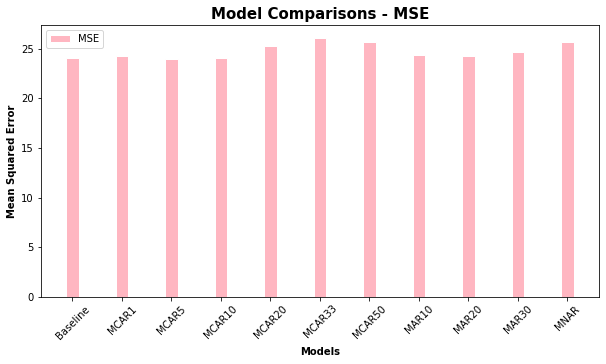

In [40]:
barWidth = 0.25

#plt.grid(zorder=0)

bars1 = MSEs  
# bars2 = MSE_DIFFs   
# bars3 = R2_diffs   
 

# Set position of bar on X axis
r1 = np.arange(len(bars1))
# r2 = [x + barWidth for x in r1]
# r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.figure(figsize=(10,5))
plt.bar(r1, bars1, color=color1, width=barWidth, edgecolor='white', label='MSE')
# plt.bar(r2, bars2, color=color2, width=barWidth, edgecolor='white', label='TS')
# plt.bar(r3, bars3, color=color3 , width=barWidth, edgecolor='white', label='DL')
 
# Add xticks on the middle of the group bars
plt.xlabel('Models', fontweight='bold')
plt.ylabel('Mean Squared Error', fontweight='bold')
plt.xticks([r  for r in range(len(bars1))], ModelNames)
plt.title('Model Comparisons - MSE',fontsize=15,fontweight='bold')

# Create legend & Show graphic
plt.legend()
plt.xticks(rotation = 45)
plt.show()

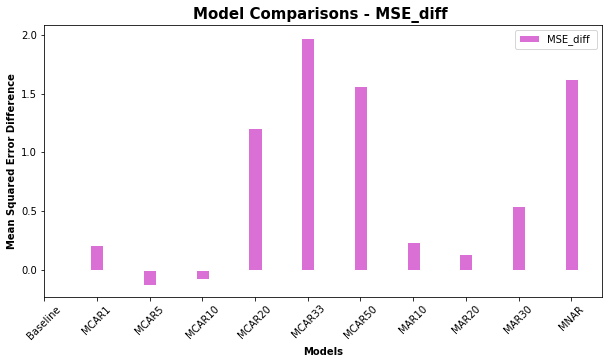

In [41]:
barWidth = 0.25

#plt.grid(zorder=0)

bars1 = MSE_DIFFs   
# bars2 = MSE_DIFFs   
# bars3 = R2_diffs   
 

# Set position of bar on X axis
r1 = np.arange(len(bars1))
# r2 = [x + barWidth for x in r1]
# r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.figure(figsize=(10,5))
plt.bar(r1, bars1, color=color2, width=barWidth, edgecolor='white', label='MSE_diff ')
# plt.bar(r2, bars2, color=color2, width=barWidth, edgecolor='white', label='TS')
# plt.bar(r3, bars3, color=color3 , width=barWidth, edgecolor='white', label='DL')
 
# Add xticks on the middle of the group bars
plt.xlabel('Models', fontweight='bold')
plt.ylabel('Mean Squared Error Difference', fontweight='bold')
plt.xticks([r  for r in range(len(bars1))], ModelNames)
plt.title('Model Comparisons - MSE_diff ',fontsize=15,fontweight='bold')

# Create legend & Show graphic
plt.legend()
plt.xticks(rotation = 45)
plt.show()

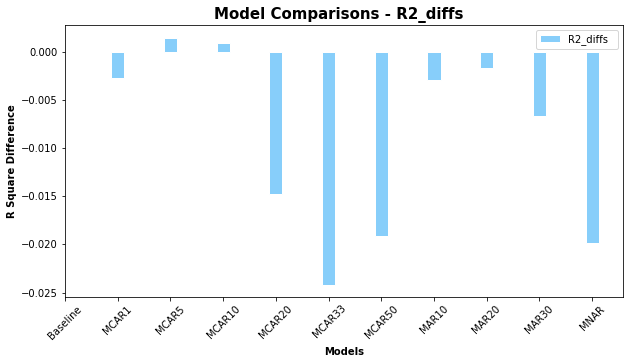

In [42]:
barWidth = 0.25

#plt.grid(zorder=0)

bars1 = R2_diffs   
# bars2 = MSE_DIFFs   
# bars3 = R2_diffs   
 

# Set position of bar on X axis
r1 = np.arange(len(bars1))
# r2 = [x + barWidth for x in r1]
# r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.figure(figsize=(10,5))
plt.bar(r1, bars1, color=color3, width=barWidth, edgecolor='white', label='R2_diffs  ')
# plt.bar(r2, bars2, color=color2, width=barWidth, edgecolor='white', label='TS')
# plt.bar(r3, bars3, color=color3 , width=barWidth, edgecolor='white', label='DL')
 
# Add xticks on the middle of the group bars
plt.xlabel('Models', fontweight='bold')
plt.ylabel('R Square Difference', fontweight='bold')
plt.xticks([r  for r in range(len(bars1))], ModelNames)
plt.title('Model Comparisons - R2_diffs  ',fontsize=15,fontweight='bold')

# Create legend & Show graphic
plt.legend()
plt.xticks(rotation = 45)
plt.show()